In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import pint
ureg = pint.UnitRegistry()

# Cálculos para la Estructura de Velas

## Fuerza de arrastre

$F_D = \frac{1}{2}\rho U^2 A_f C_D$

- U: Velocidad de l viento

- $\rho$: densidad del aires

- $A_f$ Área frontal del objeto (vela). Área que se opone a la corriente de aire.

- $C_D$ coeficiente de arrastre. Aerodinamia. Depende de la geometría del objeto. 
Un valor pesimista puede ser, para una placa inclinada, $C_D=1.3$.

In [2]:
U = 30*ureg.kilometer_per_hour  #en km/h
ρ = 1.2*ureg.kilogram/ureg.meter**3 # (en kg/m^3) #densidad volumétrica
L1, L2 = [3*ureg.meter, 4.5*ureg.meter] #dimensiones vela (metros)
ang = 45*ureg.degree  #en grados
Area_v = L1*L2/2
A_f = Area_v*np.sin(ang)  #area triangulo, inclinado
C_D = 1.3

F_D = 1/2*ρ*(U)**2*A_f*C_D
F_D.ito(ureg.newton)
display(Latex(f'Fuerza de Arrastre $F_D={F_D:.2f}$'))
display(Latex(f'Fuerza de Arrastre $F_D=${F_D.to(ureg.kilogram_force):.2f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
## Peso propio de la Vela

ρs_v = 600*ureg.gram/ureg.meter**2  #densidad superficial de la tela 
g = 9.8*ureg.meter/ureg.second**2
P_v = (ρs_v*Area_v*g)

display(Latex(f'Peso de la vela $P_v=${P_v.to(ureg.kilogram_force):.2f}'))

<IPython.core.display.Latex object>

## Resultante 

In [13]:
F_R = (F_D**2+P_v**2)**0.5
display(Latex(f'Resultante Vectorial$F_R=${F_R.to(ureg.kilogram_force):.2f}'))

<IPython.core.display.Latex object>

### Carga sobre el perno

## $\sigma_{flex} = \frac{M y}{I}$

donde $M$ es el momento flexor en la extructura. y la distancia del borde del perfil al centro de rotación opor flexión y el momento de área $I$.

Para una barra cilíndrica, 

- $y\equiv R$ 

- $I = \pi D^4/32$




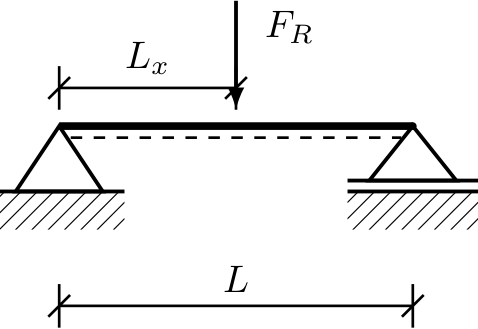

#### El momento flexor en este caso es $F_R/2 L_x$

- $L_x$ es la mitad del largo del perno

In [21]:
L_perno = 8*ureg.millimeter
R_perno = 4*ureg.millimeter
M = F_R/2*(L_perno/2)
I = np.pi*(2*R_perno)**4/32

σ_flex = M * R_perno/I
display(Latex(f'Tensión por Flexión $\sigma_{{flex}}=${σ_flex.to(ureg.kilogram_force/ureg.centimeter**2):.2f}'))

<IPython.core.display.Latex object>